In [2]:
#Import necessary packages
import keras
import numpy as np
import math
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Reshape, LSTM
import matplotlib.pyplot as plt
import pickle as cPickle


# Importing and normalizing data

In [3]:
#Import dataset and normalize to [0,1]
#Has shape (num_samples, 28, 28)
(data_train, labels_train), (data_test, labels_test) = fashion_mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0
print(data_test.shape)
data_train = data_train.reshape(60000, 28, 28, 1)
data_test = data_test.reshape(10000, 28, 28, 1)
print(data_test.shape)
#Create labels as one-hot vectors
#labels_train and labels_test have shapes (60000, 10) and (10000 10,) respectively
labels_train = keras.utils.np_utils.to_categorical(labels_train, num_classes=10)
labels_test = keras.utils.np_utils.to_categorical(labels_test, num_classes=10)


4431872/4422102 [==============================] - 0s 0us/step
(10000, 28, 28)
(10000, 28, 28, 1)


# Overfit CNN

In [ ]:
num_classes=10
#Create and train model architecture
def CNN_overfit():
    #Easiest way to build model in Keras is using Sequential. It allows models to 
    #be built layer by layer as we will do here
    model = Sequential()
    
    # Bild a 2D Convolutional layer with 256 feature maps and a 3x3 filter
    model.add(Conv2D(256 , (3,3),use_bias = False, activation = 'sigmoid', input_shape = (28,28,1)))
    
    # Add a 2x2 MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2,2), strides = None, padding = 'valid', data_format = None ))
    
    # Add a 2D Convolutional layer with 
    model.add(Conv2D(128, (3,3), activation = 'sigmoid', input_shape = (13,13,256) ))

    # Add a 2x2 MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2,2), strides = None, padding = 'valid', data_format = None ))
    
    # Flatten data for input into Dense layers
    model.add(Flatten())
    
    # Add Dense layer with 100 perceptrons
    model.add(Dense(100, activation = "relu", kernel_initializer = "normal"))
    
    # Add another Dense layer with 100 perceptrons
    model.add(Dense(100, activation = "relu", kernel_initializer = "normal"))

    #Output layer with num_classes perceptrons
    model.add(Dense(num_classes, activation = "softmax"))
    
    return model
#Create instance of CNN model graph
CNN_overfit = CNN_overfit()

#Compile model using an appropriate loss and optimizer algorithm
CNN_overfit.compile(loss = 'categorical_crossentropy', optimizer = 'RMSprop', metrics = ['accuracy'])

#Train the model and assign training meta-data to a variable
CNN_overfit_mdata = CNN_overfit.fit(data_train, labels_train, validation_data = (data_test, labels_test), epochs =100, batch_size = 2048, shuffle = True)

#Print accuracy of model on testing set after training 
scores = CNN_overfit.evaluate(data_test, labels_test)

print("Accuracy: %.2f%%" %(scores[1]*100))

Epoch 1/100
30/30 [==============================] - 47s 428ms/step - loss: 2.3443 - accuracy: 0.0990 - val_loss: 2.3072 - val_accuracy: 0.1000
Epoch 2/100
30/30 [==============================] - 11s 362ms/step - loss: 2.3073 - accuracy: 0.0969 - val_loss: 2.2979 - val_accuracy: 0.1000
Epoch 3/100
30/30 [==============================] - 11s 362ms/step - loss: 2.2261 - accuracy: 0.1654 - val_loss: 1.9032 - val_accuracy: 0.3957
Epoch 4/100
30/30 [==============================] - 11s 362ms/step - loss: 1.5639 - accuracy: 0.4219 - val_loss: 1.2387 - val_accuracy: 0.5457
Epoch 5/100
30/30 [==============================] - 11s 362ms/step - loss: 1.1114 - accuracy: 0.5848 - val_loss: 0.9666 - val_accuracy: 0.6245
Epoch 6/100
30/30 [==============================] - 11s 360ms/step - loss: 0.9667 - accuracy: 0.6323 - val_loss: 0.8695 - val_accuracy: 0.6814
Epoch 7/100
30/30 [==============================] - 11s 363ms/step - loss: 0.8892 - accuracy: 0.6590 - val_loss: 0.9965 - val_accuracy:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


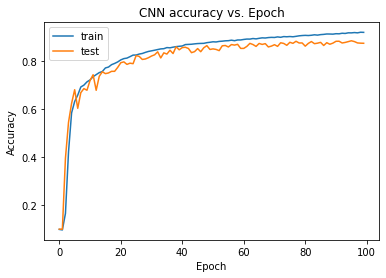

In [ ]:
#Plot accuracy vs epoch

plt.plot(CNN_overfit_mdata.history['accuracy'])
plt.plot(CNN_overfit_mdata.history['val_accuracy'])
plt.title('CNN accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='bottom right')
plt.show()

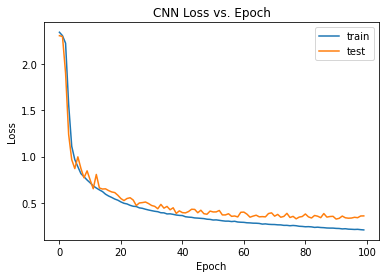

In [ ]:
#Plot loss vs epoch
plt.plot(CNN_overfit_mdata.history['loss'])
plt.plot(CNN_overfit_mdata.history['val_loss'])
plt.title('CNN Loss vs. Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()